<a href="https://colab.research.google.com/github/Mark-med/CHM/blob/main/lb9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Медведчук Марк 13 варіант лаба 9

Відрізок 1:
S_0(x) = 5.28 + 5.0162(x - 0.3) + 0.0(x - 0.3)^2 + -7.6647(x - 0.3)^3, x належить [0.3, 0.8]
Відрізок 2:
S_1(x) = 6.83 + -0.7324(x - 0.8) + -11.4971(x - 0.8)^2 + 9.7146(x - 0.8)^3, x належить [0.8, 1.4]
Відрізок 3:
S_2(x) = 4.35 + -4.0371(x - 1.4) + 5.9892(x - 1.4)^2 + -3.4949(x - 1.4)^3, x належить [1.4, 2.1]
Відрізок 4:
S_3(x) = 3.26 + -0.4174(x - 2.1) + -1.3501(x - 2.1)^2 + -0.5625(x - 2.1)^3, x належить [2.1, 2.9]
Значення сплайна:
x = 0.30, y = 5.280
x = 0.33, y = 5.530
x = 0.35, y = 5.758
x = 0.38, y = 5.964
x = 0.41, y = 6.148
x = 0.43, y = 6.311
x = 0.46, y = 6.455
x = 0.48, y = 6.579
x = 0.51, y = 6.685
x = 0.54, y = 6.774
x = 0.56, y = 6.845
x = 0.59, y = 6.899
x = 0.62, y = 6.938
x = 0.64, y = 6.962
x = 0.67, y = 6.972
x = 0.69, y = 6.968
x = 0.72, y = 6.952
x = 0.75, y = 6.923
x = 0.77, y = 6.883
x = 0.80, y = 6.832
x = 0.83, y = 6.771
x = 0.85, y = 6.701
x = 0.88, y = 6.623
x = 0.90, y = 6.536
x = 0.93, y = 6.442
x = 0.96, y = 6.342
x = 0.98, y = 6.236
x = 1.01

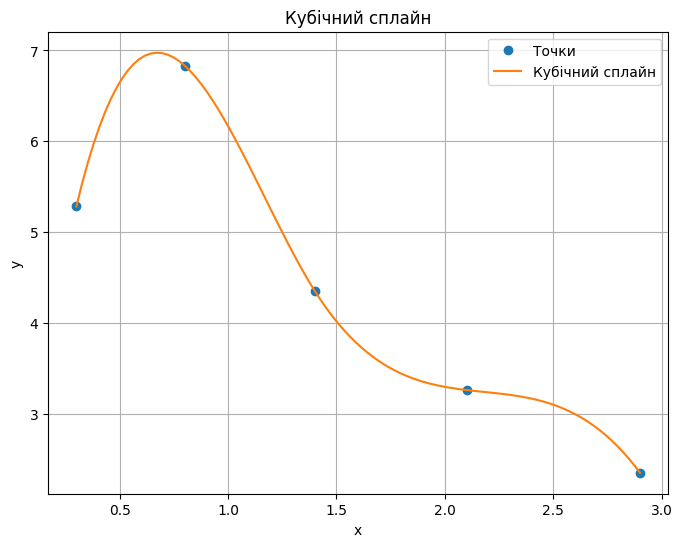

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.array([0.3, 0.8, 1.4 , 2.1, 2.9])
y = np.array([5.28 , 6.83, 4.35, 3.26, 2.35])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")
cs = CubicSpline(x, y)
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()